In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error



# Chargement des données

In [51]:
data_march = pd.read_csv('listings.csv')
data_december = pd.read_csv('listings (1).csv')
data_september = pd.read_csv('listings (2).csv')
data= pd.concat([data_march,data_december,data_september])

In [53]:
data.isnull().mean().sum().sort_values(ascending=False) * 100

AttributeError: 'numpy.float64' object has no attribute 'sort_values'

In [ ]:
data.columns

In [ ]:
data_march.columns.tolist()

['accommodates', 'bedrooms', 'bathrooms', 'price']

In [ ]:
data_march.columns.tolist()

['accommodates', 'bedrooms', 'bathrooms', 'price']

In [ ]:
data.sort_values(ascending=False, by='beds')

# Supprimer les symboles de devise et convertir en flottant

In [ ]:


data_march['price'] = data_march['price'].replace('[\$,]', '', regex=True).astype(float)
data_december['price'] = data_december['price'].replace('[\$,]', '', regex=True).astype(float)
data_september['price'] = data_september['price'].replace('[\$,]', '', regex=True).astype(float)

# Sélection des colonnes pertinentes

In [ ]:
selected_columns = ['accommodates', 'bedrooms', 'bathrooms', 'price']
data_march = data_march[selected_columns]
data_december = data_december[selected_columns]
data_september = data_september[selected_columns]

# Gestion des valeurs manquantes

In [ ]:
numerical_columns = ['accommodates', 'bedrooms', 'bathrooms']  # Colonnes numériques
imputer = SimpleImputer(strategy='median')
data_march[numerical_columns] = imputer.fit_transform(data_march[numerical_columns])
data_december[numerical_columns] = imputer.transform(data_december[numerical_columns])
data_september[numerical_columns] = imputer.transform(data_september[numerical_columns])

# Remplacer les valeurs manquantes dans les colonnes non numériques par 0

In [ ]:
data_march = data_march.fillna(0)
data_december = data_december.fillna(0)
data_september = data_september.fillna(0)


# Séparation des données en ensembles d'entraînement et de test

In [ ]:
X_train_march, X_test_march, y_train_march, y_test_march = train_test_split(data_march.drop('price', axis=1), data_march['price'], test_size=0.2, random_state=42)
X_train_december, X_test_december, y_train_december, y_test_december = train_test_split(data_december.drop('price', axis=1), data_december['price'], test_size=0.2, random_state=42)
X_train_september, X_test_september, y_train_september, y_test_september = train_test_split(data_september.drop('price', axis=1), data_september['price'], test_size=0.2, random_state=42)

# Entraînement des modèles de régression linéaire pour chaque période

In [ ]:
model_march = LinearRegression()
model_march.fit(X_train_march, y_train_march)

model_december = LinearRegression()
model_december.fit(X_train_december, y_train_december)

model_september = LinearRegression()
model_september.fit(X_train_september, y_train_september)

LinearRegression()

# Régression linéaire simple pour Mars  Décembre Septembre

In [ ]:
# Régression linéaire simple pour Mars
model_march_simple = LinearRegression()
model_march_simple.fit(X_train_march[['accommodates']], y_train_march)
predictions_march_simple = model_march_simple.predict(X_test_march[['accommodates']])
mse_march_simple = mean_squared_error(y_test_march, predictions_march_simple)
print("MSE Mars (Régression Linéaire Simple) :", mse_march_simple)

# Régression linéaire simple pour Décembre
model_december_simple = LinearRegression()
model_december_simple.fit(X_train_december[['accommodates']], y_train_december)
predictions_december_simple = model_december_simple.predict(X_test_december[['accommodates']])
mse_december_simple = mean_squared_error(y_test_december, predictions_december_simple)
print("MSE Décembre (Régression Linéaire Simple) :", mse_december_simple)

# Régression linéaire simple pour Septembre
model_september_simple = LinearRegression()
model_september_simple.fit(X_train_september[['accommodates']], y_train_september)
predictions_september_simple = model_september_simple.predict(X_test_september[['accommodates']])
mse_september_simple = mean_squared_error(y_test_september, predictions_september_simple)
print("MSE Septembre (Régression Linéaire Simple) :", mse_september_simple)

MSE Mars (Régression Linéaire Simple) : 273738.72602805245
MSE Décembre (Régression Linéaire Simple) : 622520.9759939293
MSE Septembre (Régression Linéaire Simple) : 146778.99336274865


# Combinaison des données des trois périodes

In [ ]:

all_data = pd.concat([data_march, data_december, data_september], ignore_index=True)

# Séparation des données combinées en ensembles d'entraînement et de test
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(all_data.drop('price', axis=1), all_data['price'], test_size=0.2, random_state=42)

# Régression linéaire simple pour l'ensemble combiné
model_all_simple = LinearRegression()
model_all_simple.fit(X_train_all[['accommodates']], y_train_all)
predictions_all_simple = model_all_simple.predict(X_test_all[['accommodates']])
mse_all_simple = mean_squared_error(y_test_all, predictions_all_simple)
print("MSE pour les trois périodes combinées (Régression Linéaire Simple) :", mse_all_simple)

MSE pour les trois périodes combinées (Régression Linéaire Simple) : 235602.17449197147


# Entraînement et évaluation des modèles pour chaque période

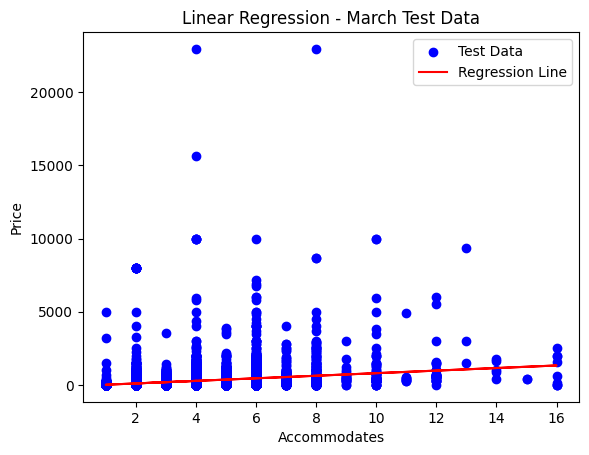

In [ ]:
plt.scatter(X_test_march['accommodates'], y_test_march, color='blue', label='Test Data')
plt.plot(X_test_march['accommodates'], predictions_march_simple, color='red', label='Regression Line')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.title('Linear Regression - March Test Data')
plt.legend()
plt.show()

plt.show()

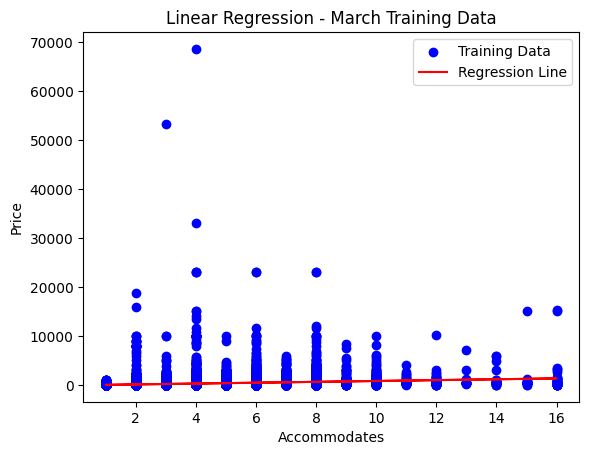

In [ ]:
plt.scatter(X_train_march['accommodates'], y_train_march, color='blue', label='Training Data')
plt.plot(X_train_march['accommodates'], model_march_simple.predict(X_train_march[['accommodates']]), color='red', label='Regression Line')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.title('Linear Regression - March Training Data')
plt.legend()
plt.show()



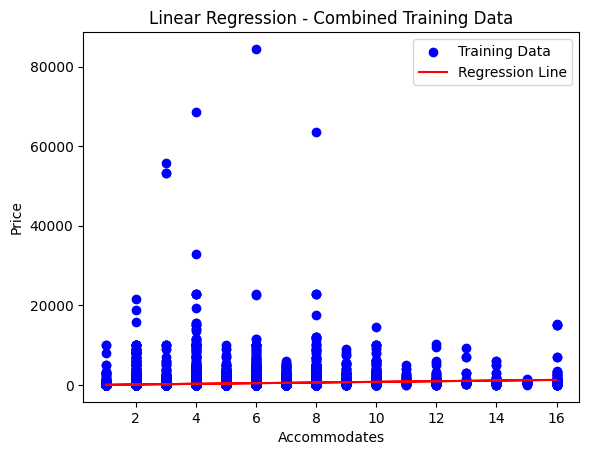

In [ ]:
plt.scatter(X_train_all['accommodates'], y_train_all, color='blue', label='Training Data')
plt.plot(X_train_all['accommodates'], model_all_simple.predict(X_train_all[['accommodates']]), color='red', label='Regression Line')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.title('Linear Regression - Combined Training Data')
plt.legend()
plt.show()


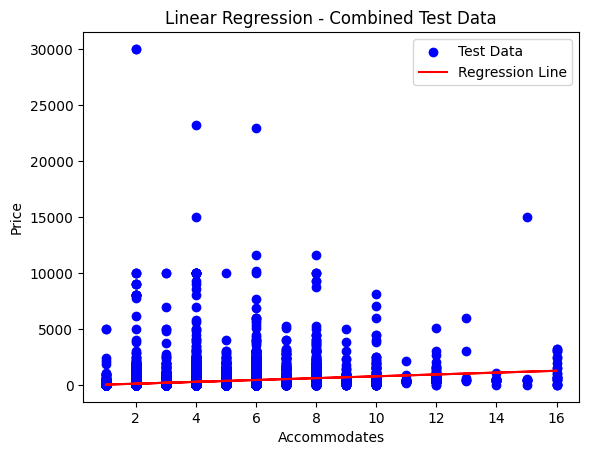

In [ ]:
plt.scatter(X_test_all['accommodates'], y_test_all, color='blue', label='Test Data')
plt.plot(X_test_all['accommodates'], predictions_all_simple, color='red', label='Regression Line')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.title('Linear Regression - Combined Test Data')
plt.legend()
plt.show()

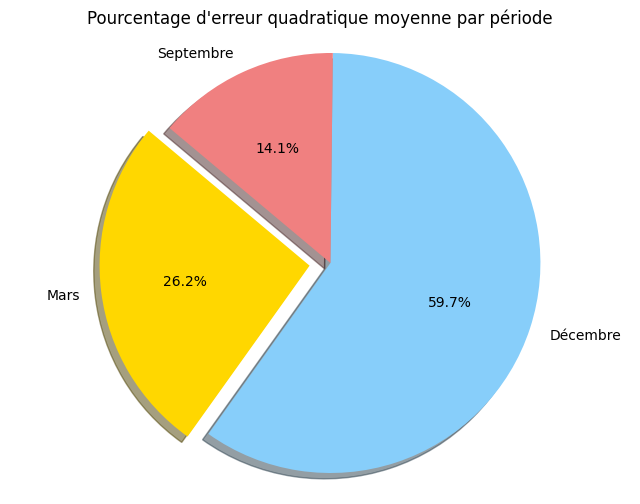

In [ ]:
# Calcul des pourcentages d'erreurs quadratiques moyennes pour chaque modèle
total_error = mse_march_simple + mse_december_simple + mse_september_simple
percentage_march = mse_march_simple / total_error * 100
percentage_december = mse_december_simple / total_error * 100
percentage_september = mse_september_simple / total_error * 100

# Création du diagramme en pourcentage rond
labels = ['Mars', 'Décembre', 'Septembre']
sizes = [percentage_march, percentage_december, percentage_september]
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0.1, 0, 0)  # Explosion du premier segment

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Pourcentage d\'erreur quadratique moyenne par période')
plt.axis('equal')  # Assure un cercle parfait
plt.show()

In [ ]:
# Prédictions combinées pour chaque mois
predictions_combined_march = model_march_combined.predict(X_test_march_combined)
predictions_combined_december = model_december_combined.predict(X_test_december_combined)
predictions_combined_september = model_september_combined.predict(X_test_september_combined)

# Calcul des erreurs quadratiques moyennes pour chaque modèle combiné
mse_combined_march = mean_squared_error(y_test_march, predictions_combined_march)
mse_combined_december = mean_squared_error(y_test_december, predictions_combined_december)
mse_combined_september = mean_squared_error(y_test_september, predictions_combined_september)

# Liste des périodes
periods = ['Mars', 'Décembre', 'Septembre']

# Liste des erreurs quadratiques moyennes
mse_combined = [mse_combined_march, mse_combined_december, mse_combined_september]

# Création du diagramme en barres
plt.bar(periods, mse_combined, color=['blue', 'green', 'red'])
plt.xlabel('Période')
plt.ylabel('Erreur quadratique moyenne')
plt.title('Erreur quadratique moyenne pour chaque période (Modèle combiné)')
plt.show()


NameError: name 'model_march_combined' is not defined

In [ ]:
# Combinaison des données des trois périodes
all_data = pd.concat([data_march, data_december, data_september], ignore_index=True)

# Séparation des données combinées en ensembles d'entraînement et de test
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(all_data.drop('price', axis=1), all_data['price'], test_size=0.2, random_state=42)

# Régression linéaire simple pour l'ensemble combiné
model_all_simple = LinearRegression()
model_all_simple.fit(X_train_all[['accommodates']], y_train_all)
predictions_all_simple = model_all_simple.predict(X_test_all[['accommodates']])
mse_all_simple = mean_squared_error(y_test_all, predictions_all_simple)
print("MSE pour les trois périodes combinées (Régression Linéaire Simple) :", mse_all_simple)

# Concaténer les données de toutes les périodes

In [ ]:

X_train_combined = pd.concat([X_train_march, X_train_december, X_train_september])
y_train_combined = pd.concat([y_train_march, y_train_december, y_train_september])

# Entraîner un modèle de régression linéaire sur les données combinées
model_combined = LinearRegression()
model_combined.fit(X_train_combined[['accommodates']], y_train_combined)

# Tracer la régression linéaire sur les données d'entraînement combinées
plt.scatter(X_train_combined['accommodates'], y_train_combined, color='blue', label='Training Data')
plt.plot(X_train_combined['accommodates'], model_combined.predict(X_train_combined[['accommodates']]), color='red', label='Regression Line')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.title('Linear Regression - Combined Training Data')
plt.legend()
plt.show()

In [ ]:
# Concaténer les données de test de toutes les périodes
X_test_combined = pd.concat([X_test_march, X_test_december, X_test_september])
y_test_combined = pd.concat([y_test_march, y_test_december, y_test_september])

# Prédire les prix pour les données de test combinées
predictions_combined = model_combined.predict(X_test_combined[['accommodates']])

# Tracer la régression linéaire sur les données de test combinées
plt.scatter(X_test_combined['accommodates'], y_test_combined, color='blue', label='Test Data')
plt.plot(X_test_combined['accommodates'], predictions_combined, color='red', label='Regression Line')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.title('Linear Regression - Combined Test Data')
plt.legend()
plt.show()

# Calcul des pourcentages d'erreurs quadratiques moyennes pour chaque modèle

In [ ]:
total_error = mse_march_simple + mse_december_simple + mse_september_simple
percentage_march = mse_march_simple / total_error * 100
percentage_december = mse_december_simple / total_error * 100
percentage_september = mse_september_simple / total_error * 100

# Création du diagramme en pourcentage rond
labels = ['Mars', 'Décembre', 'Septembre']
sizes = [percentage_march, percentage_december, percentage_september]
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0.1, 0, 0)  # Explosion du premier segment

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Pourcentage d\'erreur quadratique moyenne par période')
plt.axis('equal')  # Assure un cercle parfait
plt.show()

# Sélection des colonnes pertinentes 

In [ ]:
selected_columns_december = ['accommodates', 'bedrooms', 'bathrooms', 'price']
data_december_combined = data_december[selected_columns_december]

# Diviser les données en ensembles d'entraînement et de test
X_train_december_combined, X_test_december_combined, y_train_december_combined, y_test_december_combined = train_test_split(data_december_combined.drop('price', axis=1), data_december_combined['price'], test_size=0.2, random_state=42)

# Créer une instance de la classe LinearRegression pour le modèle de décembre combiné
model_december_combined = LinearRegression()

# Ajuster le modèle aux données d'entraînement
model_december_combined.fit(X_train_december_combined, y_train_december_combined)

In [ ]:

selected_columns_march = ['accommodates', 'bedrooms', 'bathrooms', 'price']
data_march_combined = data_march[selected_columns_march]

# Diviser les données en ensembles d'entraînement et de test
X_train_march_combined, X_test_march_combined, y_train_march_combined, y_test_march_combined = train_test_split(data_march_combined.drop('price', axis=1), data_march_combined['price'], test_size=0.2, random_state=42)

# Créer une instance de la classe LinearRegression pour le modèle de mars combiné
model_march_combined = LinearRegression()

# Ajuster le modèle aux données d'entraînement de mars combinées
model_march_combined.fit(X_train_march_combined, y_train_march_combined)

In [ ]:
selected_columns_september = ['accommodates', 'bedrooms', 'bathrooms', 'price']
data_september_combined = data_september[selected_columns_september]


# Diviser les données en ensembles d'entraînement et de test
X_train_september_combined, X_test_september_combined, y_train_september_combined, y_test_september_combined = train_test_split(data_september_combined.drop('price', axis=1), data_september_combined['price'], test_size=0.2, random_state=42)

# Créer une instance de la classe LinearRegression pour le modèle de septembre combiné
model_september_combined = LinearRegression()

# Ajuster le modèle aux données d'entraînement de septembre combinées
model_september_combined.fit(X_train_september_combined, y_train_september_combined)

# Faire des prédictions sur les données de test

In [ ]:
predictions_march_combined = model_march_combined.predict(X_test_march_combined)

# Calculer l'erreur quadratique moyenne pour mars
mse_march_combined = mean_squared_error(y_test_march_combined, predictions_march_combined)

predictions_december_combined = model_december_combined.predict(X_test_december_combined)

# Calculer l'erreur quadratique moyenne pour mars
mse_december_combined = mean_squared_error(y_test_december_combined, predictions_december_combined)

predictions_september_combined = model_september_combined.predict(X_test_september_combined)

# Calculer l'erreur quadratique moyenne pour mars
mse_september_combined = mean_squared_error(y_test_september_combined, predictions_september_combined)


NameError: name 'model_march_combined' is not defined

# Prédictions combinées pour chaque mois

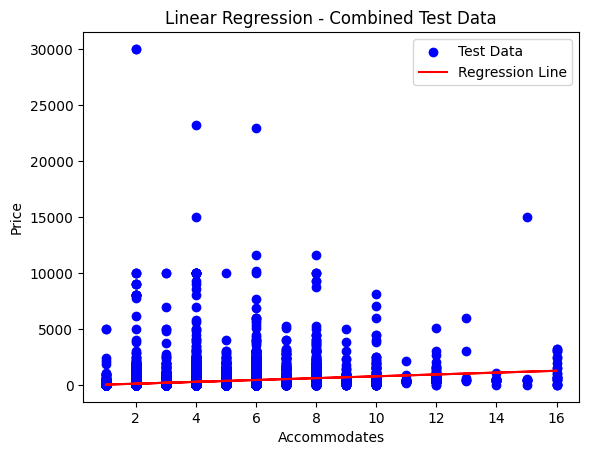

In [ ]:
plt.scatter(X_test_all['accommodates'], y_test_all, color='blue', label='Test Data')
plt.plot(X_test_all['accommodates'], predictions_all_simple, color='red', label='Regression Line')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.title('Linear Regression - Combined Test Data')
plt.legend()
plt.show()

In [ ]:
predictions_combined_march = model_march_combined.predict(X_test_march_combined)
predictions_combined_december = model_december_combined.predict(X_test_december_combined)
predictions_combined_september = model_september_combined.predict(X_test_september_combined)


# Calcul des erreurs quadratiques moyennes pour chaque modèle combiné
mse_combined_march = mean_squared_error(y_test_march, predictions_combined_march)
mse_combined_december = mean_squared_error(y_test_december, predictions_combined_december)
mse_combined_september = mean_squared_error(y_test_september, predictions_combined_september)

# Calcul de la somme totale des erreurs quadratiques moyennes
total_error_combined = mse_combined_march + mse_combined_december + mse_combined_september

# Calcul des pourcentages d'erreurs quadratiques moyennes pour chaque modèle combiné
percentage_combined_march = mse_combined_march / total_error_combined * 100
percentage_combined_december = mse_combined_december / total_error_combined * 100
percentage_combined_september = mse_combined_september / total_error_combined * 100

# Création du diagramme en pourcentage rond pour les modèles combinés
labels_combined = ['Mars', 'Décembre', 'Septembre']
sizes_combined = [percentage_combined_march, percentage_combined_december, percentage_combined_september]
colors_combined = ['gold', 'lightskyblue', 'lightcoral']
explode_combined = (0.1, 0, 0)  # Explosion du premier segment

plt.figure(figsize=(8, 6))
plt.pie(sizes_combined, explode=explode_combined, labels=labels_combined, colors=colors_combined, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Pourcentage d\'erreur quadratique moyenne pour les modèles combinés')
plt.axis('equal')  # Assure un cercle parfait
plt.show()

NameError: name 'LinearRegression' is not defined

# Plot des vraies valeurs par rapport aux prédictions

In [ ]:

plt.scatter(y_test_combined, predictions_combined, color='blue')
plt.plot([y_test_combined.min(), y_test_combined.max()], [y_test_combined.min(), y_test_combined.max()], 'k--', lw=2) # Droite y = x
plt.xlabel('Vraies valeurs')
plt.ylabel('Prédictions')
plt.title('Prédictions du modèle combiné vs vraies valeurs')
plt.show()

In [ ]:
# Calcul des erreurs quadratiques moyennes pour chaque modèle combiné
mse_combined_march = mean_squared_error(y_test_march, predictions_combined_march)
mse_combined_december = mean_squared_error(y_test_december, predictions_combined_december)
mse_combined_september = mean_squared_error(y_test_september, predictions_combined_september)

# Liste des périodes
periods = ['Mars', 'Décembre', 'Septembre']

# Liste des erreurs quadratiques moyennes
mse_combined = [mse_combined_march, mse_combined_december, mse_combined_september]

# Création du diagramme en barres
plt.bar(periods, mse_combined, color=['blue', 'green', 'red'])
plt.xlabel('Période')
plt.ylabel('Erreur quadratique moyenne')
plt.title('Erreur quadratique moyenne pour chaque période (Modèle combiné)')
plt.show()

# Utilisation des modèles pour prédire les prix pour un nouveau logement

In [ ]:


## Prédiction pour un nouveau logement en Mars
new_listing_march = pd.DataFrame({'accommodates': [5], 'bedrooms': [2], 'bathrooms': [1.5]})
predicted_price_march = model_march.predict(new_listing_march)
print("Prix estimé pour un nouveau logement en Mars :", predicted_price_march)

## Prédiction pour un nouveau logement en Décembre
new_listing_december = pd.DataFrame({'accommodates': [5], 'bedrooms': [2], 'bathrooms': [1.5]})
predicted_price_december = model_december.predict(new_listing_december)
print("Prix estimé pour un nouveau logement en Décembre :", predicted_price_december)

## Prédiction pour un nouveau logement en Septembre
new_listing_september = pd.DataFrame({'accommodates': [5], 'bedrooms': [2], 'bathrooms': [1.5]})
predicted_price_september = model_september.predict(new_listing_september)
print("Prix estimé pour un nouveau logement en Septembre :", predicted_price_september)

# Utilisation des modèles pour prédire les prix pour un nouveau logement

In [ ]:
new_listing_march = pd.DataFrame({'accommodates': [5], 'bedrooms': [2], 'bathrooms': [1.5]})
predicted_price_march = model_march.predict(new_listing_march)
print("Prix estimé pour un nouveau logement en Mars :", predicted_price_march)

new_listing_december = pd.DataFrame({'accommodates': [5], 'bedrooms': [2], 'bathrooms': [1.5]})
predicted_price_december = model_december.predict(new_listing_december)
print("Prix estimé pour un nouveau logement en Décembre :", predicted_price_december)

new_listing_september = pd.DataFrame({'accommodates': [5], 'bedrooms': [2], 'bathrooms': [1.5]})
predicted_price_september = model_september.predict(new_listing_september)
print("Prix estimé pour un nouveau logement en Septembre :", predicted_price_september)

Prix estimé pour un nouveau logement en Mars : [434.45359144]
Prix estimé pour un nouveau logement en Décembre : [4078.94546775]
Prix estimé pour un nouveau logement en Septembre : [351.18869706]


In [ ]:
# Utilisation des modèles pour prédire les prix pour un nouveau logement
new_listing = pd.DataFrame({'accommodates': [5], 'bedrooms': [2], 'bathrooms': [1.5]})

predicted_price_march = model_march.predict(new_listing)
predicted_price_december = model_december.predict(new_listing)
predicted_price_september = model_september.predict(new_listing)

# Calcul de la moyenne des prix prédits pour les trois périodes
predicted_price_global = (predicted_price_march + predicted_price_december + predicted_price_september) / 3

print("Prix estimé pour un nouveau logement sur les trois périodes (Mars, Décembre, Septembre) :", predicted_price_global)


Prix estimé pour un nouveau logement sur les trois périodes (Mars, Décembre, Septembre) : [1621.52925209]


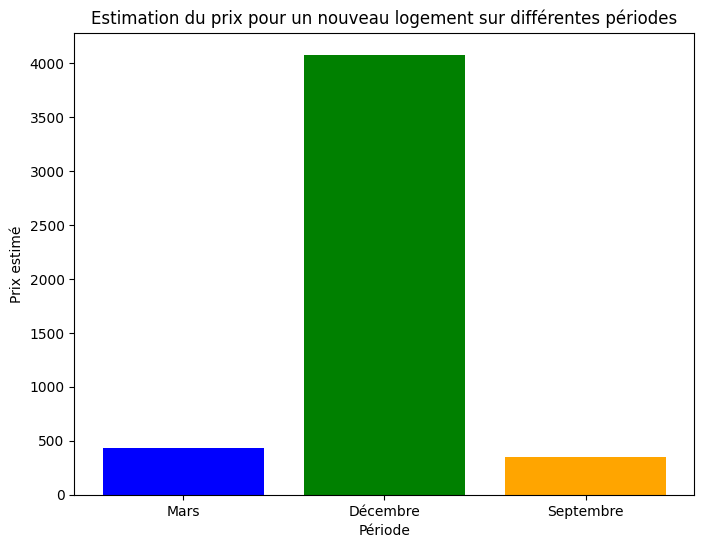

In [ ]:
import matplotlib.pyplot as plt

# Création du DataFrame pour les prédictions
predictions = pd.DataFrame({
    'Période': ['Mars', 'Décembre', 'Septembre'],
    'Prix estimé': [predicted_price_march[0], predicted_price_december[0], predicted_price_september[0]]
})

# Tracé du graphique
plt.figure(figsize=(8, 6))
plt.bar(predictions['Période'], predictions['Prix estimé'], color=['blue', 'green', 'orange'])
plt.title('Estimation du prix pour un nouveau logement sur différentes périodes')
plt.xlabel('Période')
plt.ylabel('Prix estimé')
plt.show()
